In [1]:
# Import modules
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
# Function to return y0dot and y1dot
# We set g=l, Omega = 2/3
def derivatives(y,t,q,F):
    return [y[1], -np.sin(y[0])-q*y[1]+F*np.sin(2*t/3)]

In [3]:
# Numerical integration for undriven, undamped oscillations
natural_period = 2*np.pi
number_of_oscillations = 50
dt = 0.1

t = np.arange(0.0, natural_period*number_of_oscillations, dt)
y0 = [0.01, 0.0]
q = 0.0
F = 0.0

y = integrate.odeint(derivatives,y0,t,args=(q,F,))

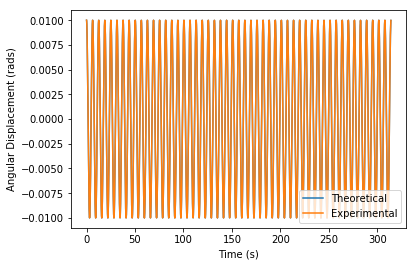

In [4]:
# Plot result
plt.plot(t,y0[0]*np.cos(t)) # theoretical result
plt.plot(t,y[0:,0]) # experimental result
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement (rads)')
plt.legend(['Theoretical', 'Experimental'], loc='lower right')
plt.savefig('Small_undriven_undamped_oscillation.pdf')

In [5]:
# Conservation of energy for undriven, undamped oscillations
natural_period = 2*np.pi
number_of_oscillations = 100
dt = 0.1

t = np.arange(0.0, natural_period*number_of_oscillations, dt)
y0 = [0.01, 0.0]
q = 0.0
F = 0.0

y = integrate.odeint(derivatives,y0,t,args=(q,F,))
initial_total_energy = 1-np.cos(y[0,0])+0.5*(y[0,1])**2 
percentage_of_energy = (1-np.cos(y[0:,0])+0.5*(y[0:,1])**2)*100/initial_total_energy # mgl(1-cos(theta))+1/2ml^2(thetadot)^2 up to a factor


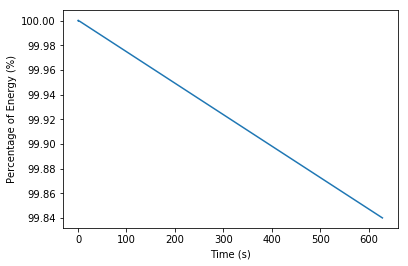

In [6]:
# Plot energy result
plt.plot(t,percentage_of_energy)
plt.xlabel('Time (s)')
plt.ylabel('Percentage of Energy (%)')
plt.savefig('Enery_vs_Time_for_Small_Undriven_Undamped_Oscillation.pdf')

In [7]:
# Period vs Amplitude
natural_period = 2*np.pi
number_of_oscillations = 10
dt = 0.1
increment_in_initial_amplitude = 0.005

t = np.arange(0.0, natural_period*number_of_oscillations, dt)
q = 0.0
F = 0.0
T = [] # array to store period
amplitude = []

for i in np.arange(increment_in_initial_amplitude,1,increment_in_initial_amplitude):
    y0 = [i*np.pi, 0.0]
    y = integrate.odeint(derivatives,y0,t,args=(q,F,))
    for j in range(len(y[0:,0])):
        if y[j,0]*y[0,0] < 0: # cross zero -> ~T/4
            break
    T.append(t[j]*4)
    amplitude.append(i*np.pi)
    
    if abs(i-0.5) < 0.001: # pull out the period for theta_0=pi/2
        print(t[j]*4)


7.6000000000000005


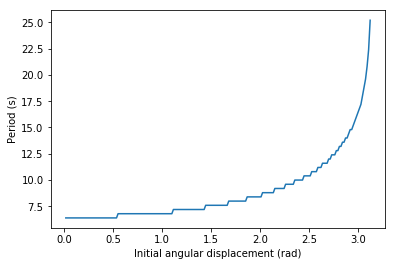

In [8]:
# Plot period vs amplitude result
plt.plot(amplitude,T)
plt.xlabel('Initial angular displacement (rad)')
plt.ylabel('Period (s)')
plt.savefig('Period_vs_Amplitude.pdf')